# Importing Libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler 
import numpy as np
from sklearn.model_selection import train_test_split
import os, cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D

2024-11-28 15:01:13.439817: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Import Data

In [2]:
import pandas as pd
data = pd.read_csv('/Users/frentzenhenrytaslim/Desktop/360 final dataset/hmnist_28_28_RGB.csv')
data.head()

pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0        192        153        193        195        155        192   
1         25         14         30         68         48         75   
2        192        138        153        200        145        163   
3         38         19         30         95         59         72   
4        158        113        139        194        144        174   

   pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel2343  pixel2344  \
0        197        154        185        202  ...        173        124   
1        123         93        126        158  ...         60         39   
2        201        142        160        206  ...        167        129   
3        143        103        119        171  ...         44         26   
4        215        162        191        225  ...        209        166   

   pixel2345  pixel2346  pixel2347  pixel2348  pixel2349  pixel2350  \
0        138        183        147        166        185        154   
1         55         25         14         28         25         14   
2        143        159        124        142        136        104   
3         36         25         12         17         25         12   
4        185        172        135        149        109         78   

   pixel2351  label  
0        177      2  
1         27      2  
2        117      2  
3         15      2  
4         92      2  

[5 rows x 2353 columns]

In [3]:
y = data['label']
x = data.drop(columns = ['label'])

# Exploratory Data Analysis (EDA)

In [4]:
tabular_data = pd.read_csv('/Users/frentzenhenrytaslim/Desktop/360 final dataset/HAM10000_metadata.csv')
tabular_data.head()

lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear

In [5]:
classes = {4: ('nv', ' melanocytic nevi'), 6: ('mel', 'melanoma'), 2 :('bkl', 'benign keratosis-like lesions'), 1:('bcc' , ' basal cell carcinoma'), 5: ('vasc', ' pyogenic granulomas and hemorrhage'), 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  3: ('df', 'dermatofibroma')}

# Frequency Distribution of Classes

Text(0.5, 1.0, 'Frequency Distribution of Classes')

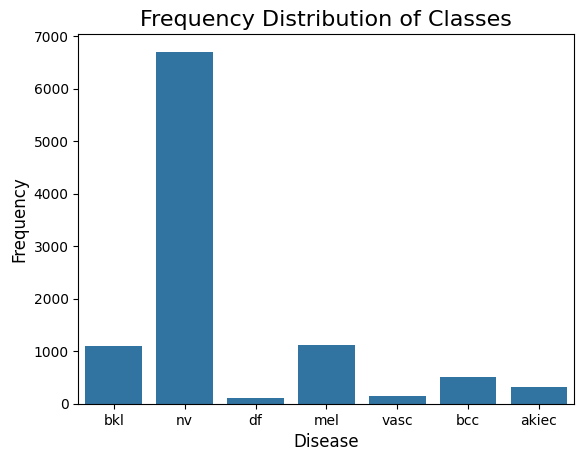

In [6]:
sns.countplot(x = 'dx', data = tabular_data)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes', size=16)

# Distribution of Disease over Gender

Text(0.5, 1.0, 'Gender of Patient')

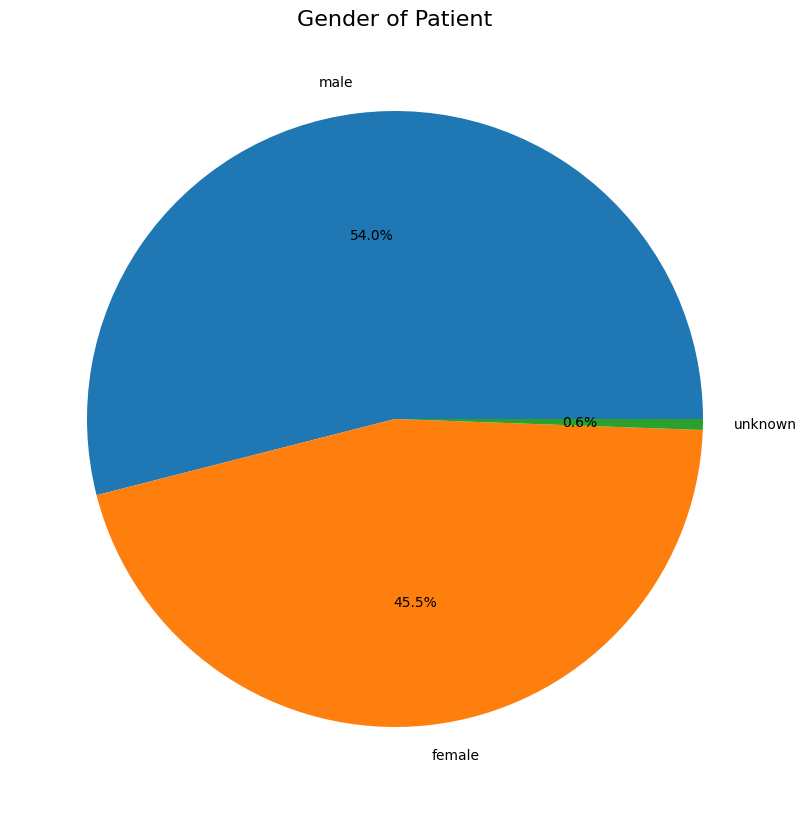

In [7]:
bar, ax = plt.subplots(figsize = (10,10))
plt.pie(tabular_data['sex'].value_counts(), labels = tabular_data['sex'].value_counts().index, autopct="%.1f%%")
plt.title('Gender of Patient', size=16)

# Histogram of Age of Patients

Text(0.5, 1.0, 'Histogram of Age of Patients')

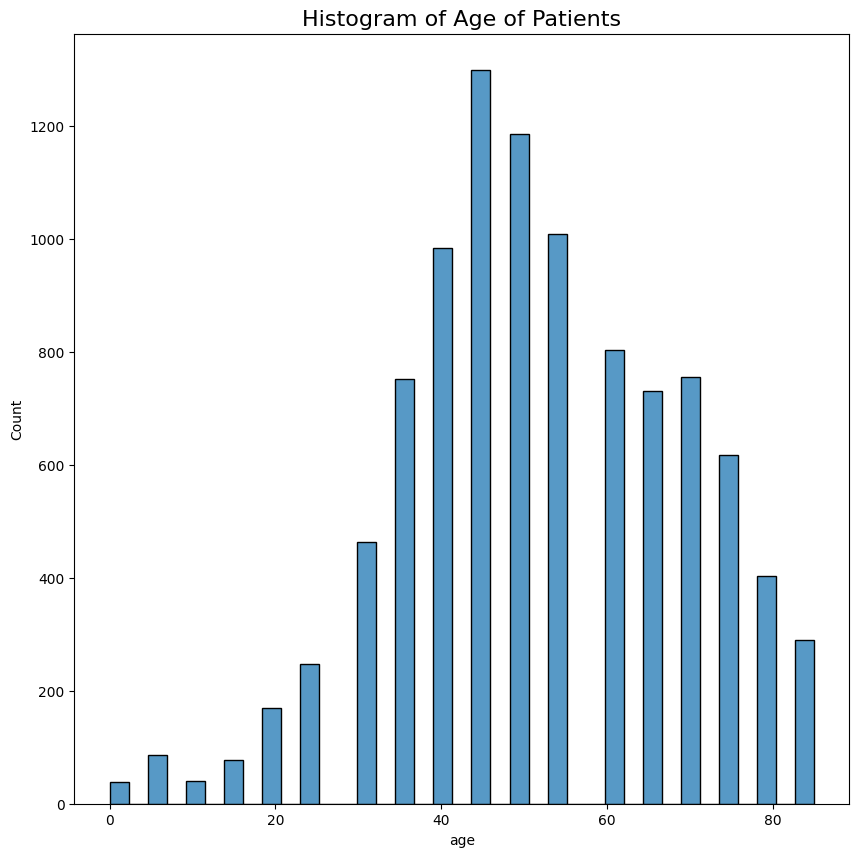

In [8]:
bar, ax = plt.subplots(figsize=(10,10))
sns.histplot(tabular_data['age'])
plt.title('Histogram of Age of Patients', size=16)

# Location of disease over Gender

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'back'),
  Text(1, 0, 'lower extremity'),
  Text(2, 0, 'trunk'),
  Text(3, 0, 'upper extremity'),
  Text(4, 0, 'abdomen'),
  Text(5, 0, 'face'),
  Text(6, 0, 'chest'),
  Text(7, 0, 'foot'),
  Text(8, 0, 'scalp'),
  Text(9, 0, 'neck'),
  Text(10, 0, 'unknown'),
  Text(11, 0, 'hand'),
  Text(12, 0, 'genital'),
  Text(13, 0, 'ear'),
  Text(14, 0, 'acral')])

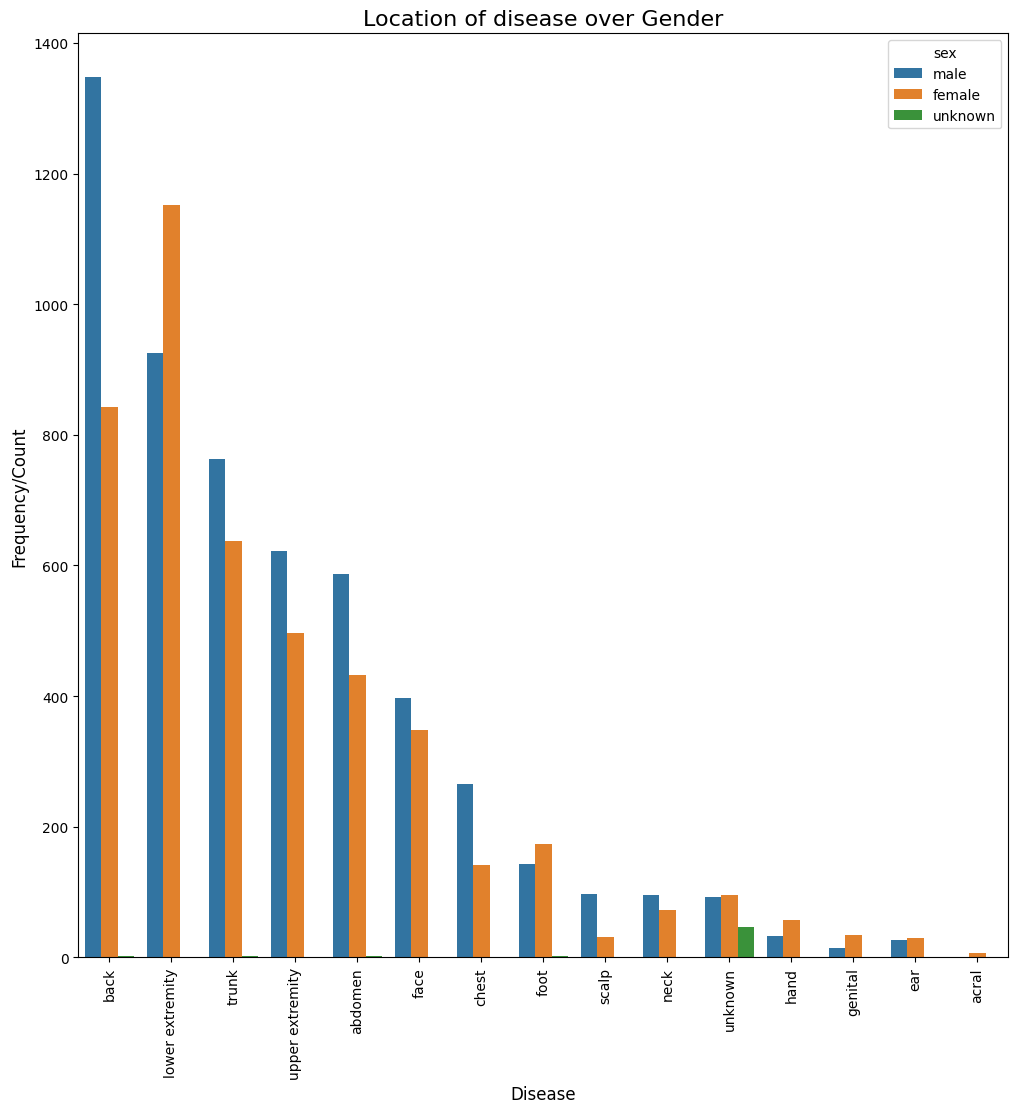

In [9]:
value = tabular_data[['localization', 'sex']].value_counts().to_frame()
value.reset_index(level=[1,0 ], inplace=True)
temp = value.rename(columns = {'localization':'location', 0: 'count'})

bar, ax = plt.subplots(figsize = (12, 12))
sns.barplot(x = 'location',  y='count', hue = 'sex', data = temp)
plt.title('Location of disease over Gender', size = 16)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency/Count', size=12)
plt.xticks(rotation = 90)

# Oversampling
**To overcome class imbalace**

In [10]:
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(x,y)

In [11]:
x = np.array(x).reshape(-1,28,28,3)
print('Shape of X :',x.shape)

Shape of X : (46935, 28, 28, 3)


# Standardization and Splitting Data

In [12]:
x = (x-np.mean(x))/np.std(x)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=1)

# Model Training

In [13]:
model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 182,663 (713.53 KB)

 Trainable params: 182,663 (713.53 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.weights.h5',
                                                  monitor='val_acc', mode='max',
                                                 verbose=1, save_weights_only=True)


In [15]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
              metrics = ['accuracy'])
history = model.fit(X_train,
                    Y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 20,
                    callbacks=[callback])

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.4354 - loss: 1.4398
Epoch 1: saving model to best_model.weights.h5
235/235 ━━━━━━━━━━━━━━━━━━━━ 37s 147ms/step - accuracy: 0.4358 - loss: 1.4388 - val_accuracy: 0.6955 - val_loss: 0.8418
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.7153 - loss: 0.7739
Epoch 2: saving model to best_model.weights.h5
235/235 ━━━━━━━━━━━━━━━━━━━━ 35s 147ms/step - accuracy: 0.7155 - loss: 0.7736 - val_accuracy: 0.7989 - val_loss: 0.5679
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.8316 - loss: 0.4700
Epoch 3: saving model to best_model.weights.h5
235/235 ━━━━━━━━━━━━━━━━━━━━ 35s 147ms/step - accuracy: 0.8317 - loss: 0.4699 - val_accuracy: 0.8583 - val_loss: 0.3868
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.8868 - loss: 0.3143
Epoch 4: saving model to best_model.weights.h5
235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 169ms/step - accuracy: 0.8869 - loss: 0.3142 - val_accuracy: 0.9063

# Plot Accuracy and Loss

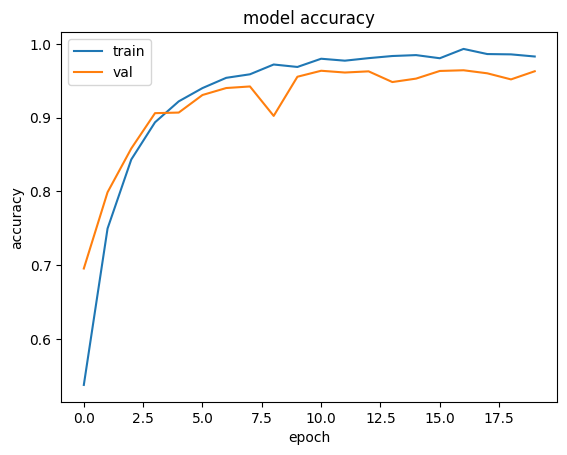

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

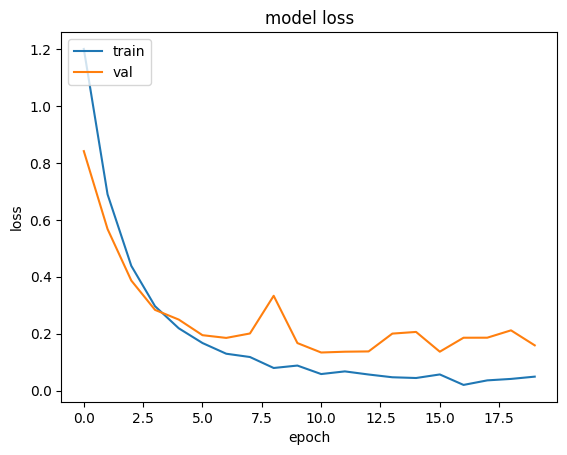

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [18]:
model.load_weights('best_model.weights.h5')


# Model Testing

In [19]:
loss, acc = model.evaluate(X_test, Y_test, verbose=2)

294/294 - 3s - 10ms/step - accuracy: 0.9646 - loss: 0.1635


294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


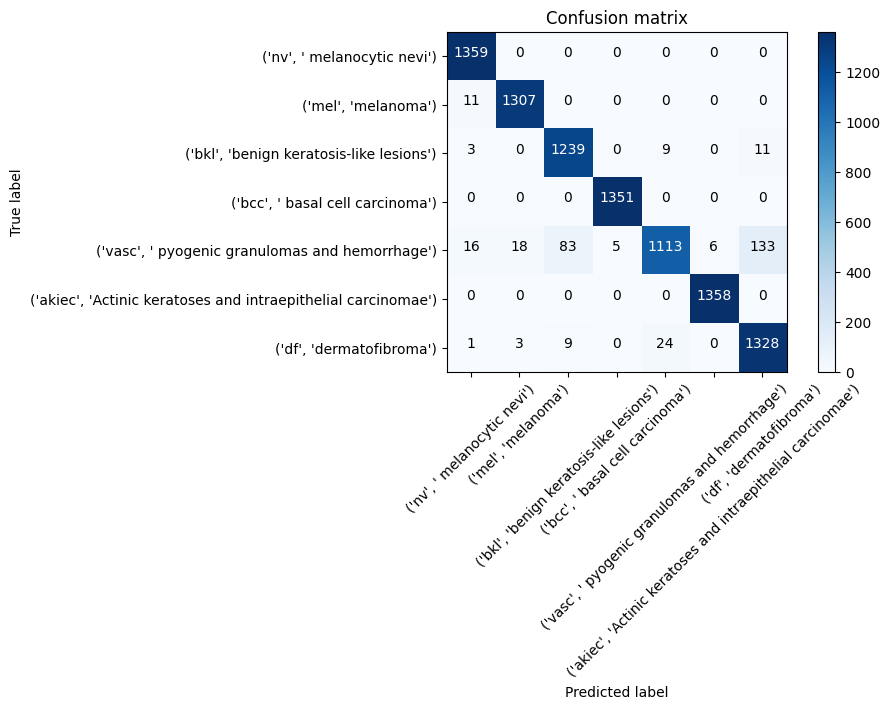

In [23]:
import itertools
from sklearn.metrics import confusion_matrix
# Function to plot confusion matrix    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    fig, ax = plt.subplots(figsize = (10, 7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
#Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_test, Y_pred_classes)

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes.values()) 

# Model Inference

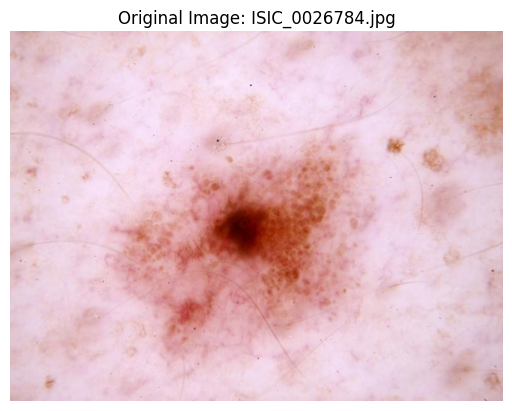

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction: ('bcc', ' basal cell carcinoma'), Confidence: 100.00%


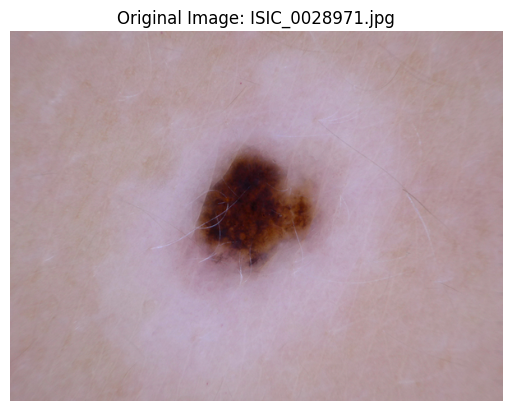

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prediction: ('nv', ' melanocytic nevi'), Confidence: 100.00%


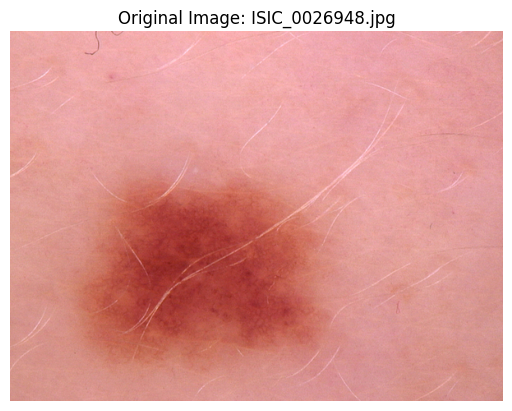

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Prediction: ('bcc', ' basal cell carcinoma'), Confidence: 100.00%


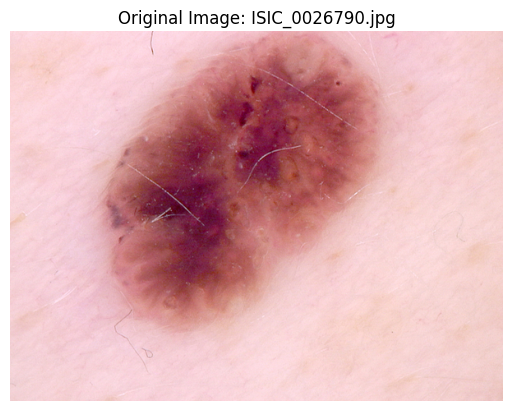

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Prediction: ('df', 'dermatofibroma'), Confidence: 100.00%


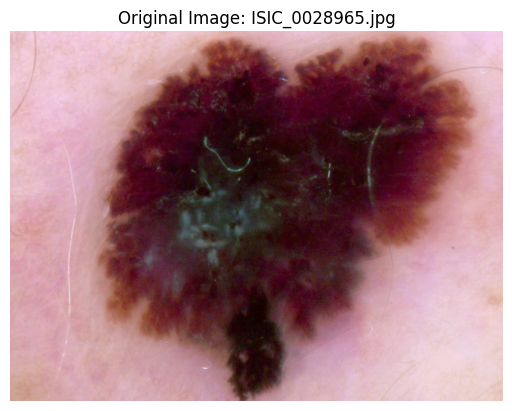

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Prediction: ('nv', ' melanocytic nevi'), Confidence: 100.00%


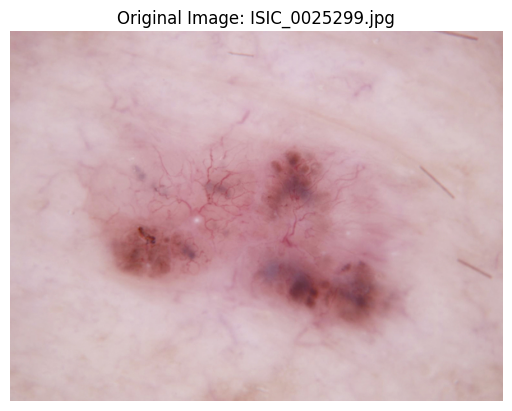

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Prediction: ('bcc', ' basal cell carcinoma'), Confidence: 100.00%


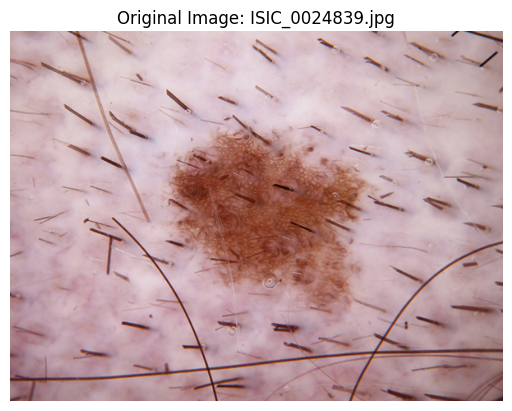

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Prediction: ('bcc', ' basal cell carcinoma'), Confidence: 100.00%


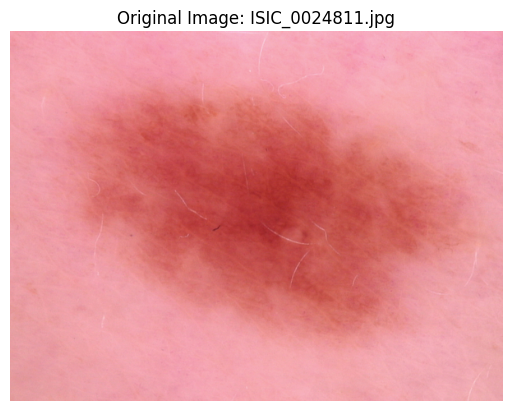

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction: ('nv', ' melanocytic nevi'), Confidence: 100.00%


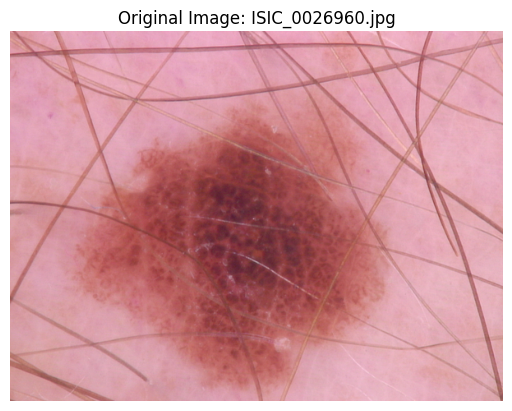

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction: ('bcc', ' basal cell carcinoma'), Confidence: 100.00%


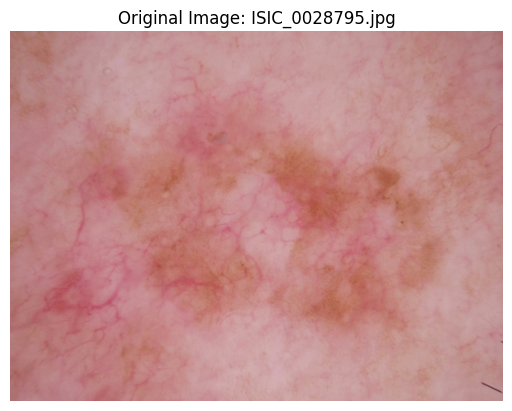

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prediction: ('bcc', ' basal cell carcinoma'), Confidence: 100.00%


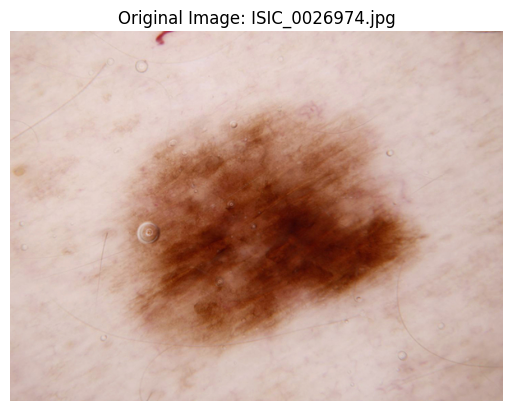

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction: ('bcc', ' basal cell carcinoma'), Confidence: 100.00%


In [26]:
import matplotlib.pyplot as plt
import cv2
import os

srcdir = '/Users/frentzenhenrytaslim/Desktop/360 final dataset/HAM10000_images_part_1'
count = 0

# for temp in os.listdir(srcdir):
#     img = cv2.imread(os.path.join(srcdir, temp))
#     img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for proper display
#     plt.imshow(img_rgb)
#     plt.title(f"Original Image: {temp}")
#     plt.axis('off')
#     plt.show()

#     # Preprocess and make prediction
#     img_resized = cv2.resize(img, (28, 28))
#     # img_normalized = img_resized / 255.0  # Normalize image to [0, 1]
#     result = model.predict(img_resized.reshape(1, 28, 28, 3))
#     max_prob = max(result[0])
#     class_ind = list(result[0]).index(max_prob)
#     class_name = classes[class_ind]
#     print(f"Prediction: {class_name}, Confidence: {max_prob * 100:.2f}%")
#     count += 1
#     if count > 10:
#         break

for temp in os.listdir(srcdir):
    img = cv2.imread(os.path.join(srcdir, temp))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for proper display
    plt.imshow(img_rgb)
    plt.title(f"Original Image: {temp}")
    plt.axis('off')
    plt.show()

    # Preprocess and normalize image
    img_resized = cv2.resize(img_rgb, (28, 28))  # Resize image to 28x28
    img_normalized = (img_resized - np.mean(x)) / np.std(x)  # Normalize like training data
    
    # Predict using the trained model
    result = model.predict(img_normalized.reshape(1, 28, 28, 3))
    max_prob = max(result[0])
    class_ind = np.argmax(result[0])
    class_name = classes[class_ind]
    
    # Display prediction
    print(f"Prediction: {class_name}, Confidence: {max_prob * 100:.2f}%")
    count += 1
    if count > 10:
        break
